In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df1=pd.read_csv(r"C:\Users\El-Wattaneya\Desktop\CS\lvl 4\Semester 1\Big Data\Lab\Disscution tasks\BlackFriday\dastaset\BlackFriday.csv")


In [4]:
#display first 10 rows
df1.head(10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
#Check for duplicate records and remove them if present.
df1.duplicated().sum()


0

In [7]:
df1.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577,537577,537577,537577.00000,537577,537577,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
unique,NaN,3623,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1858,405380,214690,NaN,226493,189192,NaN,NaN,NaN,NaN,NaN
mean,1.002992e+06,NaN,NaN,NaN,8.08271,NaN,NaN,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,NaN,NaN,NaN,6.52412,NaN,NaN,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,NaN,NaN,NaN,0.00000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,NaN,NaN,NaN,2.00000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,NaN,NaN,NaN,7.00000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,NaN,NaN,NaN,14.00000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12073.000000


In [8]:
df1.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
#preprocessing
replacement_map = {'0': 'no years', '1': '1 year', '2': '2 years', '3': '3 years', '+4': 'more than 4 years'}

df1['Stay_In_Current_City_Years'].replace(replacement_map, inplace=True)

In [10]:
df1.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2 years,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2 years,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2 years,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2 years,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3 years,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2 years,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2 years,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2 years,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1 year,1,8,NaN,NaN,7871


In [11]:
df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].astype(str).str.replace('+', '')
df1

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_68\2620072119.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].astype(str).str.replace('+', '')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2 years,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2 years,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2 years,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2 years,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1 year,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1 year,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1 year,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1 year,0,5,NaN,NaN,7172


In [12]:
#preprocessing
replacement_map = {'0': 'no years', '1': '1 year', '2': '2 years', '3': '3 years', '4': 'more than 4 years'}

df1['Stay_In_Current_City_Years'].replace(replacement_map, inplace=True)
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2 years,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2 years,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2 years,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2 years,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,more than 4 years,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1 year,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1 year,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1 year,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1 year,0,5,NaN,NaN,7172


In [13]:
# Specify the column you want to check for categories
column_to_check = 'Gender'

# Check unique categories in the specified column
unique_categories = df1[column_to_check].unique()

# Print or further process the unique categories
print("Unique Categories in {}: {}".format(column_to_check, unique_categories))

Unique Categories in Gender: ['F' 'M']


In [14]:
# Specify the columns to replace null values
columns_to_replace_null = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

# Replace null values with 0 in the specified columns
df1[columns_to_replace_null] = df1[columns_to_replace_null].fillna(0)

In [15]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2 years,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2 years,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2 years,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2 years,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,more than 4 years,0,8,0.0,0.0,7969


In [16]:
df1.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [18]:
##########Data Exploration :  


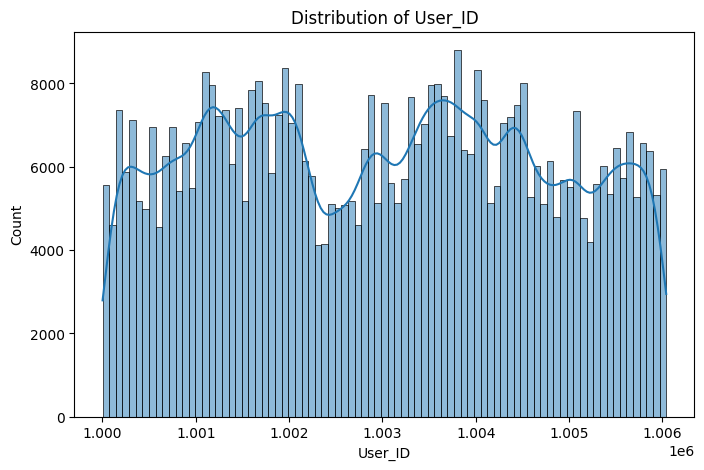

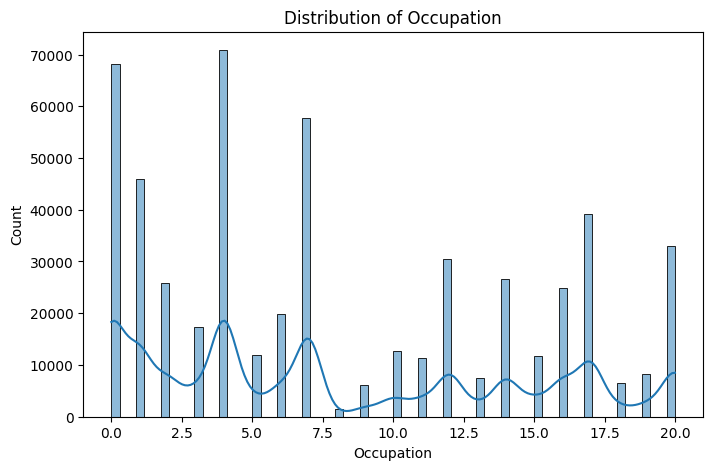

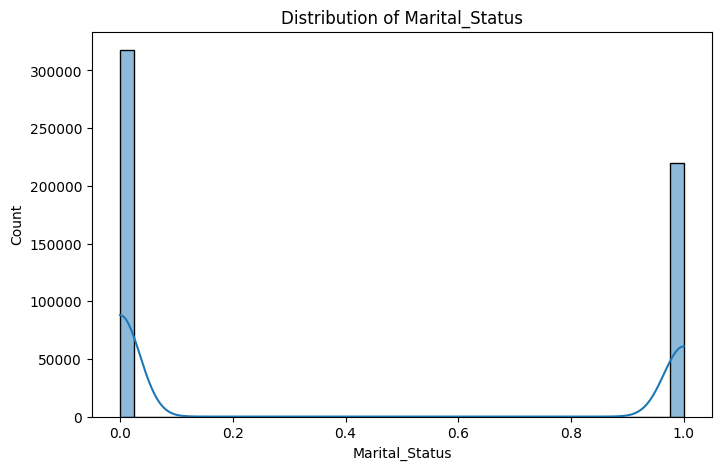

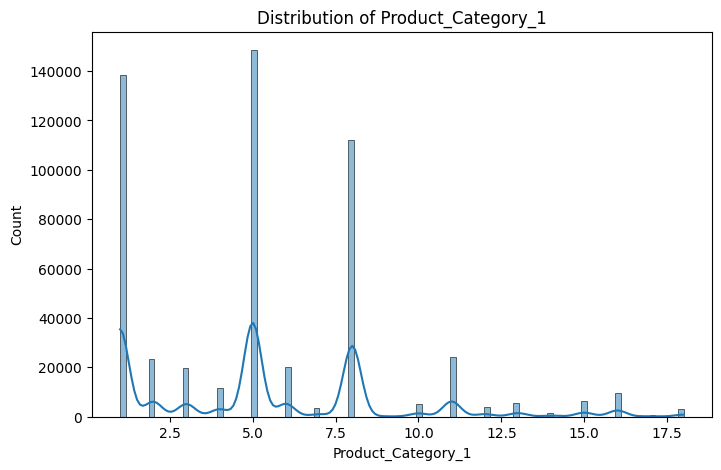

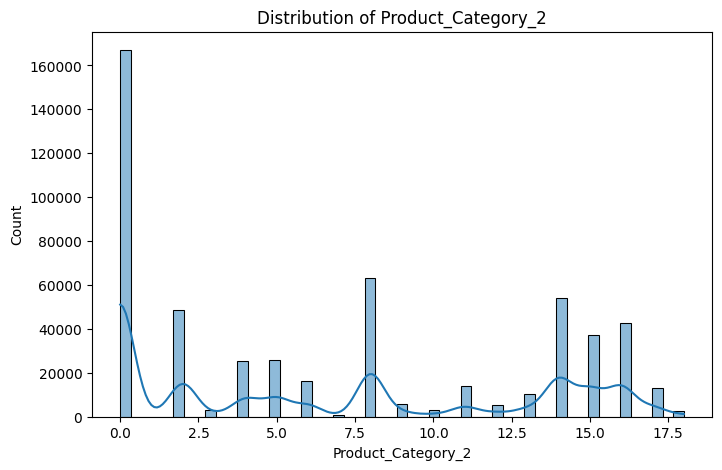

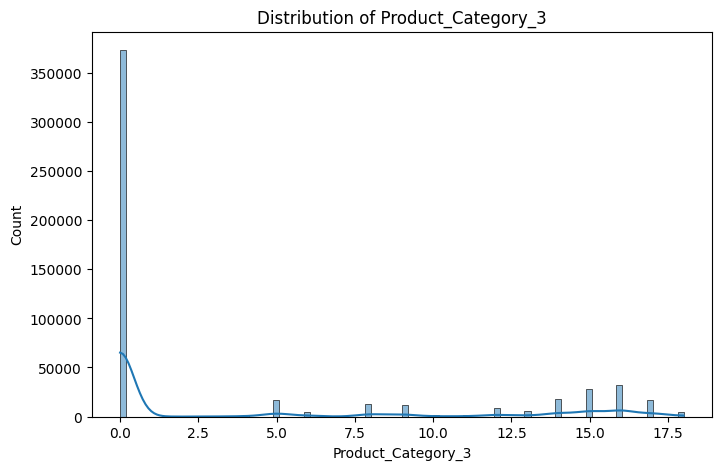

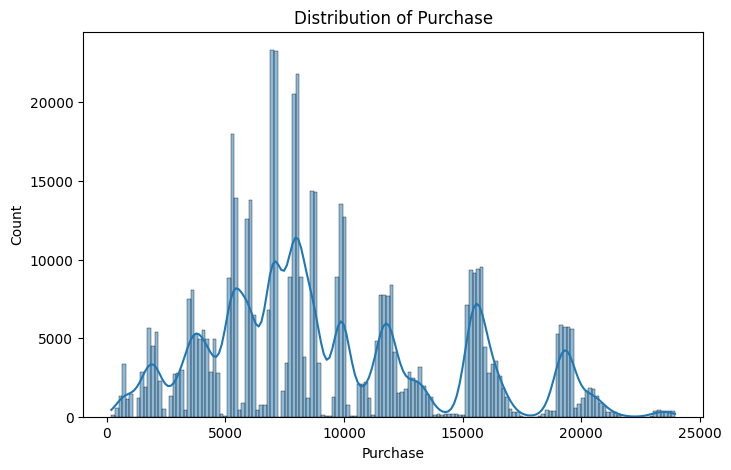

In [19]:
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [20]:
# Summary statistics
purchase_summary = df1['Purchase'].describe()
purchase_summary

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [21]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Purchase Amounts')

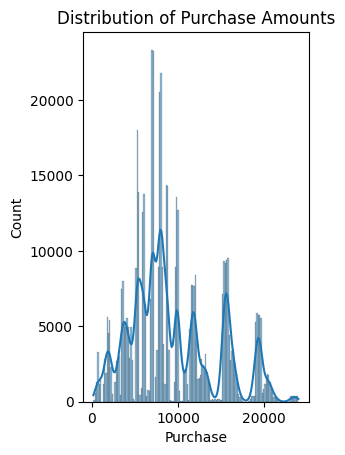

In [22]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df1['Purchase'], kde=True)
plt.title('Distribution of Purchase Amounts')

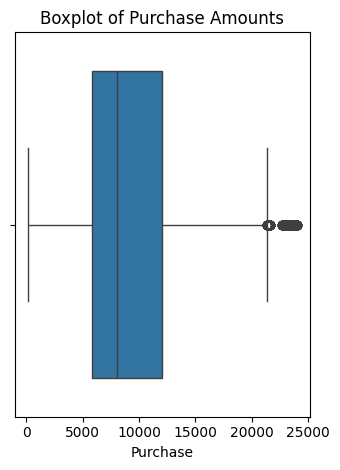

In [23]:
# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Purchase'])
plt.title('Boxplot of Purchase Amounts')

plt.tight_layout()
plt.show()

In [24]:
print("Summary Statistics for Purchase Amount:\n", purchase_summary)


Summary Statistics for Purchase Amount:
 count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64


In [25]:
df_encoded = pd.get_dummies(df1, columns=['Gender', 'City_Category'], drop_first=True)
df_encoded

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
0,1000001,P00069042,0-17,10,2 years,0,3,0.0,0.0,8370,0,0,0
1,1000001,P00248942,0-17,10,2 years,0,1,6.0,14.0,15200,0,0,0
2,1000001,P00087842,0-17,10,2 years,0,12,0.0,0.0,1422,0,0,0
3,1000001,P00085442,0-17,10,2 years,0,12,14.0,0.0,1057,0,0,0
4,1000002,P00285442,55+,16,more than 4 years,0,8,0.0,0.0,7969,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,36-45,16,1 year,0,1,2.0,0.0,11664,1,0,1
537573,1004737,P00111142,36-45,16,1 year,0,1,15.0,16.0,19196,1,0,1
537574,1004737,P00345942,36-45,16,1 year,0,8,15.0,0.0,8043,1,0,1
537575,1004737,P00285842,36-45,16,1 year,0,5,0.0,0.0,7172,1,0,1


In [28]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Gender' column
df1['Gender_LabelEncoded'] = label_encoder.fit_transform(df1['Gender'])

# Display the encoded DataFrame
print(df1[['Gender', 'Gender_LabelEncoded']])


       Gender  Gender_LabelEncoded
0           F                    0
1           F                    0
2           F                    0
3           F                    0
4           M                    1
...       ...                  ...
537572      M                    1
537573      M                    1
537574      M                    1
537575      M                    1
537576      M                    1

[537577 rows x 2 columns]


In [29]:
# Perform one-hot encoding for 'City_Category'
df_encoded = pd.get_dummies(df1, columns=['City_Category'], prefix='City', drop_first=True)

# Display the encoded DataFrame
print(df_encoded)

        User_ID Product_ID Gender    Age  Occupation  \
0       1000001  P00069042      F   0-17          10   
1       1000001  P00248942      F   0-17          10   
2       1000001  P00087842      F   0-17          10   
3       1000001  P00085442      F   0-17          10   
4       1000002  P00285442      M    55+          16   
...         ...        ...    ...    ...         ...   
537572  1004737  P00193542      M  36-45          16   
537573  1004737  P00111142      M  36-45          16   
537574  1004737  P00345942      M  36-45          16   
537575  1004737  P00285842      M  36-45          16   
537576  1004737  P00118242      M  36-45          16   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                         2 years               0                   3   
1                         2 years               0                   1   
2                         2 years               0                  12   
3                         2 years  

In [30]:
'''
In summary, for 'City_Category' with three non-ordinal categories, one-hot encoding is a suitable choice.
For 'Gender' with two categories, label encoding is appropriate. Always consider the characteristics
of your data and the requirements of your analysis or model when choosing the encoding technique.

'''

"\nIn summary, for 'City_Category' with three non-ordinal categories, one-hot encoding is a suitable choice.\nFor 'Gender' with two categories, label encoding is appropriate. Always consider the characteristics\nof your data and the requirements of your analysis or model when choosing the encoding technique.\n\n"

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing the data
# If you haven't already, you can replace the DataFrame creation part with your actual dataset loading logic

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Reshape the 'Purchase' column to a 2D array before scaling
df1['Purchase_Amount_Normalized'] = scaler.fit_transform(df1['Purchase'].values.reshape(-1, 1))

# Display the DataFrame with the normalized column
print(df1[['Purchase', 'Purchase_Amount_Normalized']])


        Purchase  Purchase_Amount_Normalized
0           8370                    0.344255
1          15200                    0.631519
2           1422                    0.052027
3           1057                    0.036676
4           7969                    0.327389
...          ...                         ...
537572     11664                    0.482798
537573     19196                    0.799588
537574      8043                    0.330501
537575      7172                    0.293868
537576      6875                    0.281376

[537577 rows x 2 columns]


In [32]:
from scipy.stats import zscore

# Assuming df is your DataFrame containing the data
# If you haven't already, you can replace the DataFrame creation part with your actual dataset loading logic

# Calculate Z-scores for the 'Purchase' column
df1['Purchase_Zscore'] = zscore(df1['Purchase'])

# Define a Z-score threshold (e.g., 3)
zscore_threshold = 3

# Identify outliers based on the Z-score
outliers = df1[abs(df1['Purchase_Zscore']) > zscore_threshold]

# Display the rows with outliers
print("Rows with Outliers:")
print(outliers[['Purchase', 'Purchase_Zscore']])


Rows with Outliers:
Empty DataFrame
Columns: [Purchase, Purchase_Zscore]
Index: []


In [33]:
#Outlier not Found , try again in another task

In [34]:
# Visualization: Purchase behavior by gender
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

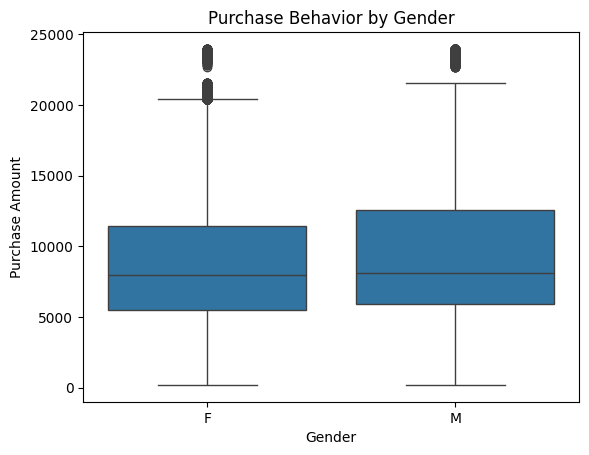

In [35]:

# Boxplot
sns.boxplot(x='Gender', y='Purchase', data=df1)
plt.title('Purchase Behavior by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()



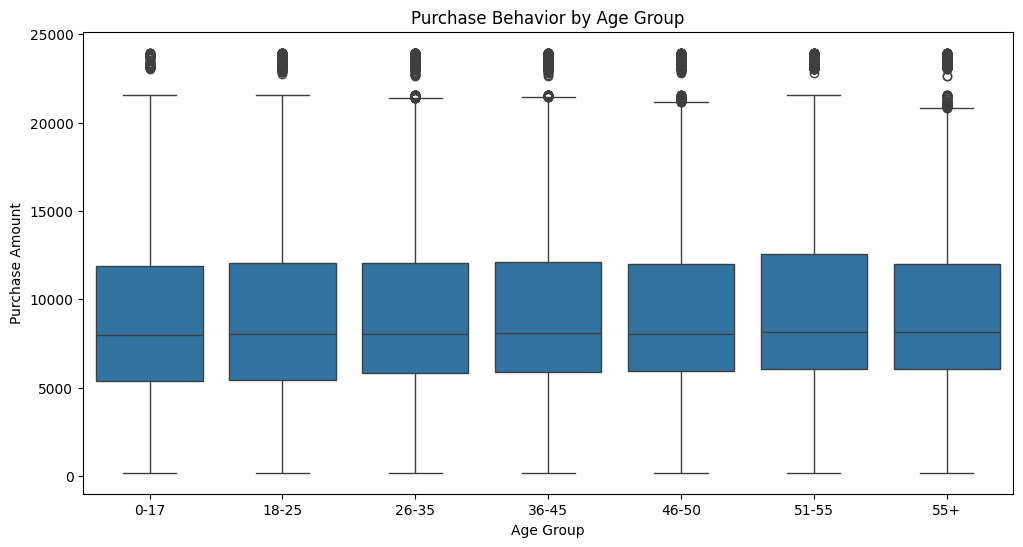

In [36]:
# Visualization: Purchase behavior by age group
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(x='Age', y='Purchase', data=df1, order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Purchase Behavior by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()


In [37]:
df1.to_csv('BlackFridayCleanning.csv')